# Markov random fields (a.k.a. Markov Networks)

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.mrf2graph as m2g

## building a Markov random field

In [2]:
gum.config.reset() # back to default

mn=gum.fastMRF("A--B--C;C--D;B--E--F;F--D--G;H--J;E--A;J")
mn

(pyAgrum.MarkovRandomField<double>@0x55f358a3d590) MRF{nodes: 9, edges: 12, domainSize: 512, dim: 38}

Using `pyAgrum.config`, it is possible to adapt the graphical representations for Markov random field (see [99-Tools_configForPyAgrum.ipynb](configForPyAgrum.ipynb.html) ).

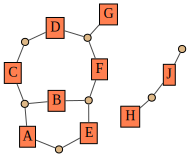

In [3]:
gum.config.reset() # back to default
gum.config['factorgraph','edge_length']='0.4'
gnb.showMRF(mn)

In [4]:
gum.config.reset() # back to default
print("Default view for Markov random field: "+gum.config['notebook','default_markovnetwork_view'])
gum.config['notebook','default_markovnetwork_view']='graph'
print("modified to: "+gum.config['notebook','default_markovnetwork_view'])
mn

Default view for Markov random field: factorgraph
modified to: graph


(pyAgrum.MarkovRandomField<double>@0x55f358a3d590) MRF{nodes: 9, edges: 12, domainSize: 512, dim: 38}

In [5]:
gnb.sideBySide(gnb.getMRF(mn,view="graph",size="5"),
               gnb.getMRF(mn,view="factorgraph",size="5"))

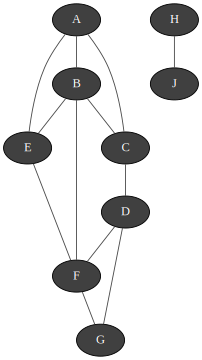

MRF{nodes: 9, edges: 12, domainSize: 512, dim: 38}


In [6]:
gnb.showMRF(mn)
print(mn)

## Accessors for Markov random fields

In [7]:
print(f"nodes       : {mn.nodes()}")
print(f"node names  : {mn.names()}")
print(f"edges       : {mn.edges()}")
print(f"components  : {mn.connectedComponents()}")
print(f"factors     : {mn.factors()}")
print(f"factor(C,D) : {mn.factor({2,3})}")
print(f"factor(C,D) : {mn.factor({'C','D'})}")

nodes       : {0, 1, 2, 3, 4, 5, 6, 7, 8}
node names  : {'E', 'H', 'F', 'A', 'B', 'G', 'D', 'J', 'C'}
edges       : {(0, 1), (1, 2), (0, 4), (1, 5), (1, 4), (2, 3), (4, 5), (0, 2), (5, 6), (7, 8), (3, 6), (3, 5)}
components  : {0: {0, 1, 2, 3, 4, 5, 6}, 7: {8, 7}}
factors     : [{0, 1, 2}, {2, 3}, {8, 7}, {1, 4, 5}, {3, 5, 6}, {0, 4}, {8}]
factor(C,D) : 
      ||  C                |
D     ||0        |1        |
------||---------|---------|
0     || 0.9853  | 0.5215  |
1     || 0.8366  | 0.3155  |

factor(C,D) : 
      ||  C                |
D     ||0        |1        |
------||---------|---------|
0     || 0.9853  | 0.5215  |
1     || 0.8366  | 0.3155  |



In [8]:
try:
    mn.factor({0,1})
except gum.GumException as e:
    print(e)
try:
    mn.factor({"A","B"})
except gum.GumException as e:
    print(e)

[pyAgrum] Object not found: No element with the key <{1,0}>
[pyAgrum] Object not found: No element with the key <{1,0}>


## Manipulating factors

In [9]:
mn.factor({'A','B','C'})

(pyAgrum.Potential<double>@0x55f3596fd470) 
             ||  A                |
B     |C     ||0        |1        |
------|------||---------|---------|
0     |0     || 0.9292  | 0.5502  |
1     |0     || 0.6150  | 0.2451  |
0     |1     || 0.3471  | 0.9431  |
1     |1     || 0.1095  | 0.3653  |

In [10]:
mn.factor({'A','B','C'})[{'B':0}]

array([[0.92915526, 0.55017071],
       [0.34707509, 0.94313641]])

In [11]:
mn.factor({'A','B','C'})[{'B':0}]=[[1,2],[3,4]]
mn.factor({'A','B','C'})

(pyAgrum.Potential<double>@0x55f3596fd470) 
             ||  A                |
B     |C     ||0        |1        |
------|------||---------|---------|
0     |0     || 1.0000  | 2.0000  |
1     |0     || 0.6150  | 0.2451  |
0     |1     || 3.0000  | 4.0000  |
1     |1     || 0.1095  | 0.3653  |

## Customizing graphical representation

In [12]:
gum.config.reset() # back to default
gum.config['factorgraph','edge_length']='0.5'

maxnei=max([len(mn.neighbours(n)) for n in mn.nodes()])
nodemap={n:len(mn.neighbours(mn.idFromName(n)))/maxnei for n in mn.names()}

facmax=max([len(f) for f in mn.factors()])
fgma=lambda factor: (1+len(factor)**2)/(1+facmax*facmax)

gnb.flow.row(gnb.getGraph(m2g.MRF2UGdot(mn)),
               gnb.getGraph(m2g.MRF2UGdot(mn,nodeColor=nodemap)),
               gnb.getGraph(m2g.MRF2FactorGraphdot(mn)),
               gnb.getGraph(m2g.MRF2FactorGraphdot(mn,factorColor=fgma,nodeColor=nodemap)),
               captions=['Markov random field',
                         'MarkovRandomField with colored node w.r.t number of neighbours',
                         'MarkovRandomField as factor graph',
                         'MRF with colored factor w.r.t to the size of scope'])

## from BayesNet to MarkovRandomField

In [13]:
bn=gum.fastBN("A->B<-C->D->E->F<-B<-G;A->H->I;C->J<-K<-L")
mn=gum.MarkovRandomField.fromBN(bn)
gnb.flow.row(bn,
               gnb.getGraph(m2g.MRF2UGdot(mn)),
               captions=['a Bayesian network',
                         'the corresponding Markov random field'])

In [14]:
# The corresponding factor graph
m2g.MRF2FactorGraphdot(mn)

## Inference in Markov random field

In [15]:
bn=gum.fastBN("A->B<-C->D->E->F<-B<-G;A->H->I;C->J<-K<-L")
iebn=gum.LazyPropagation(bn)

mn=gum.MarkovRandomField.fromBN(bn)
iemn=gum.ShaferShenoyMRFInference(mn)
iemn.setEvidence({"A":1,"F":[0.4,0.8]})
iemn.makeInference()
iemn.posterior("B")

(pyAgrum.Potential<double>@0x55f3595a07e0) 
  B                |
0        |1        |
---------|---------|
 0.4656  | 0.5344  |

In [16]:
def affAGC(evs):
    gnb.sideBySide(gnb.getSideBySide(gum.getPosterior(bn,target="A",evs=evs),
                                     gum.getPosterior(bn,target="G",evs=evs),
                                     gum.getPosterior(bn,target="C",evs=evs)),
                   gnb.getSideBySide(gum.getPosterior(mn,target="A",evs=evs),
                                     gum.getPosterior(mn,target="G",evs=evs),
                                     gum.getPosterior(mn,target="C",evs=evs)),
                   captions=["Inference in the Bayesian network bn with evidence "+str(evs),
                             "Inference in the Markov random field mn with evidence "+str(evs)]
                  )
    
print("Inference for both the corresponding models in BayesNet and Markoc Random Field worlds when the MRF comes from a BN")
affAGC({})
print("C has no impact on A and G")
affAGC({'C':1})

print("But if B is observed")
affAGC({'B':1})
print("C has an impact on A and G")
affAGC({'B':1,'C':0})

Inference for both the corresponding models in BayesNet and Markoc Random Field worlds when the MRF comes from a BN


C has no impact on A and G


But if B is observed


C has an impact on A and G


In [17]:
mn.generateFactors()
print("But with more general factors")
affAGC({})
print("C has impact on A and G even without knowing B")
affAGC({'C':1})


But with more general factors


C has impact on A and G even without knowing B


## Graphical inference in Markov random field

In [18]:
bn=gum.fastBN("A->B<-C->D->E->F<-B<-G;A->H->I;C->J<-K<-L")
mn=gum.MarkovRandomField.fromBN(bn)

gnb.sideBySide(gnb.getJunctionTree(bn),gnb.getJunctionTree(mn),captions=["Junction tree for the BN","Junction tree for the induced MN"])
gnb.sideBySide(gnb.getJunctionTreeMap(bn,size="3!"),gnb.getJunctionTreeMap(mn,size="3!"),captions=["Map of the junction tree for the BN","Map of the junction tree for the induced MN"])

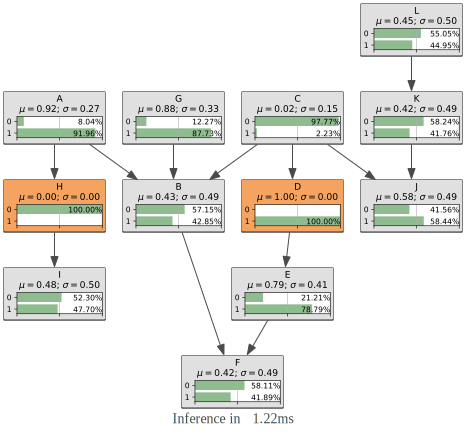

In [19]:
gnb.showInference(bn,evs={"D":1,"H":0})

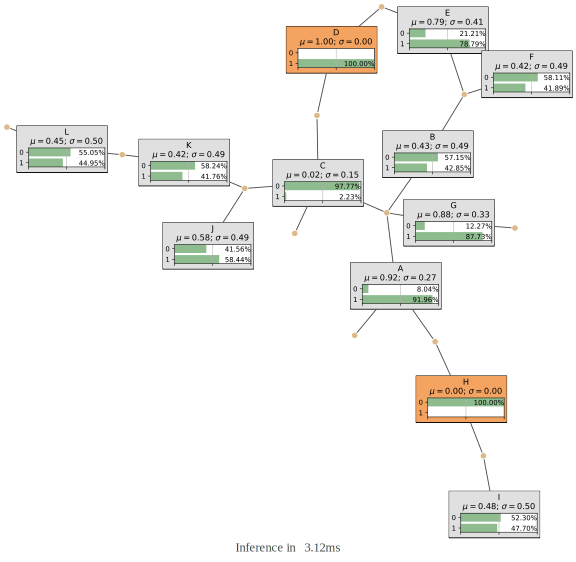

In [20]:
gum.config.reset()
gnb.showInference(mn,size="8",evs={"D":1,"H":0})

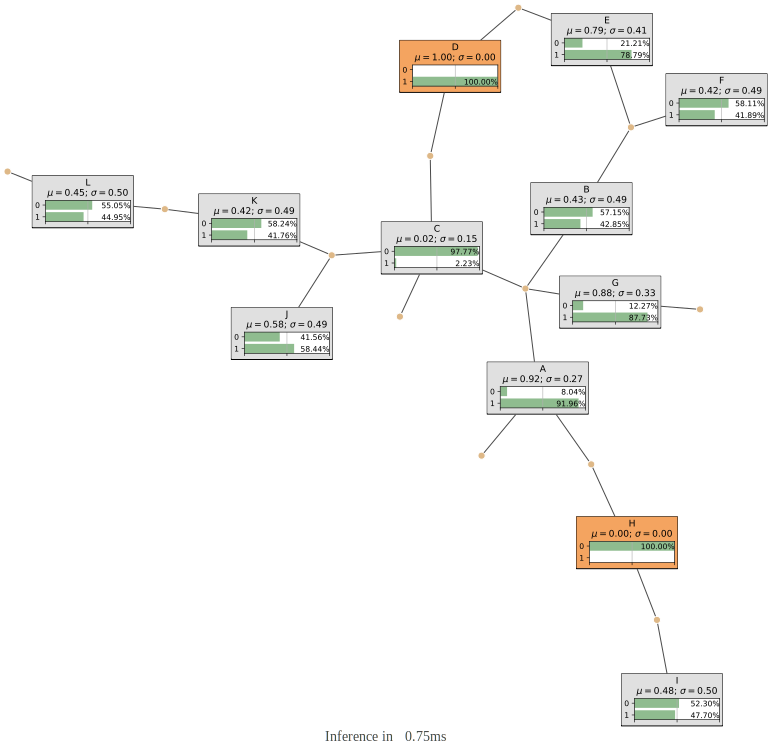

In [21]:
gum.config['factorgraph','edge_length_inference']='1.1'
gnb.showInference(mn,size="11",evs={"D":1,"H":0})

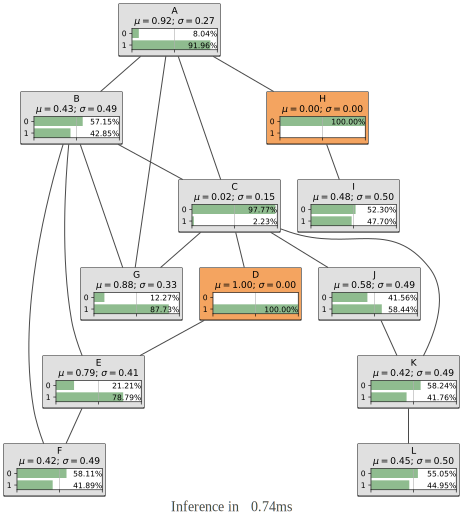

In [22]:
gum.config['notebook','default_markovnetwork_view']='graph'
gnb.showInference(mn,size="8",evs={"D":1,"H":0})